In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import datetime
import sys
sys.path.append("../../")
sys.path.append("../dsmuc/")
import dsmuc.custom as cs
import scipy.signal as signal 
sns.set(style="darkgrid")

label_dict = {1:'walking',
             2:'walking upstairs',
             3:'walking downstairs',
             4:'sitting',
             5:'standing',
             6:'laying'}

        
interested_cols = [ 'accX', 'accY', 'accZ', 'gyroX','gyroY', 'gyroZ']


In [2]:
def upsample(df, n):
    df_t = df[interested_cols]
    x = df_t.index.values
    y = df_t.values
    f = signal.resample(y, n, window=signal.get_window('hamming', df_t.shape[0]))
    df_final = pd.DataFrame(f, columns=interested_cols)

    df_final['subject_id'] = df['subject_id'][0]
    df_final['label'] = df['label'][0]
    return df_final[['subject_id']+interested_cols+ ['label']]


In [3]:
label_folders = next(os.walk('/home/ahmet/notebooks/data/G9_data/Raw/snippets/'))[1]
n = 128
saveto = "/home/ahmet/notebooks/data/G9_data/Raw/snippets_eq_sized/"+str(n)+'/'
if not os.path.exists(saveto):
    os.makedirs(saveto)

for nr in [1, 2, 3, 4,5, 6]:
    if not os.path.exists(saveto + label_dict[nr]):
        os.makedirs(saveto + label_dict[nr])

In [4]:

for fol in label_folders:
    folder = '/home/ahmet/notebooks/data/G9_data/Raw/snippets/'+fol+'/'
    print("Started the process of : ",fol )
    for root,dirs,files in os.walk(folder):
        for file_ in files:
            if file_.endswith(".csv"):
                df_temp = pd.read_csv(folder+file_)
                df_temp = upsample(df_temp,n)
                df_temp.to_csv(saveto+fol+'/'+file_)
    
    print("Finished the process of : ", fol )


('Started the process of : ', 'standing')
('Finished the process of : ', 'standing')
('Started the process of : ', 'walking upstairs')
('Finished the process of : ', 'walking upstairs')
('Started the process of : ', 'laying')
('Finished the process of : ', 'laying')
('Started the process of : ', 'sitting')
('Finished the process of : ', 'sitting')
('Started the process of : ', 'walking downstairs')
('Finished the process of : ', 'walking downstairs')
('Started the process of : ', 'walking')
('Finished the process of : ', 'walking')


In [5]:
a  = pd.read_csv("/home/ahmet/notebooks/data/G9_data/Raw/snippets/walking/10_1.csv", index_col='date', parse_dates=True)


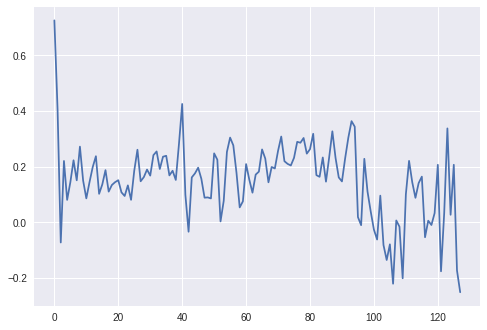

In [6]:
plt.plot(upsample(a, 128)['accX'])
plt.show()

In [7]:
olddata = pd.read_csv('/home/ahmet/notebooks/data/G9_data/Raw/snippets/walking/10_1.csv')
newdata = pd.read_csv('/home/ahmet/notebooks/data/G9_data/Raw/snippets_eq_sized/128/walking/10_1.csv')


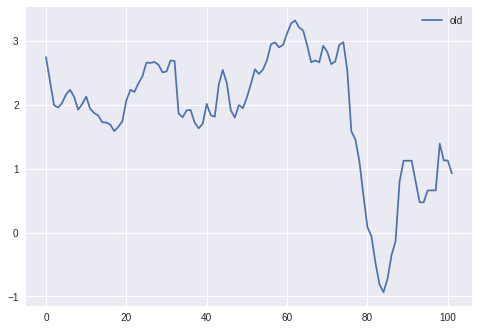

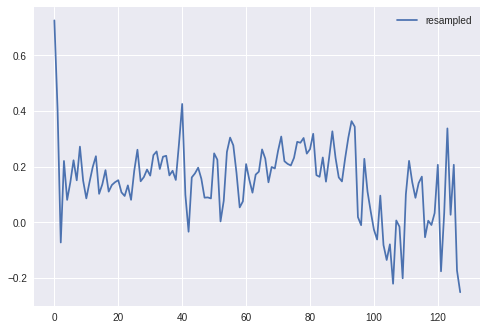

In [8]:

plt.plot(olddata["accX"])
plt.legend(['old'], loc='best')
plt.show()
plt.plot(newdata["accX"] )
plt.legend(['resampled'], loc='best')
plt.show()

In [97]:
len(glob.glob("/home/ahmet/notebooks/data/G9_data/Raw/snippets_eq_sized/128/"+'*/*.csv'))

25028